# Ex. 4
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [38]:
id1 = "205560782"
id2 = "315810176"


name_student_1 = "Inbar, Tzur"
name_student_2 = "Ronen, Kurman"


import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

#df = pd.DataFrame([id1,id2])
#Uncomment in case two students are doing the assignment together
#df = pd.DataFrame([id1,id2])
#df = pd.DataFrame

q1- we did dropna on all of the missing value and present the three first row by the asked columns

In [39]:
file='https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
data=pd.read_csv(file)
data1=data.dropna()
data_flt=data1[[ 'Age','Height','Weight','Salary']]
data_flt.dropna().reset_index(drop = True).head(3)


,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0



q2- we made two 2 columns splited by '-', after that we made the 3 new column and multiplax every column in the value to cm , after that we drop the unimportent columns and present the result

In [40]:
pd.set_option('mode.chained_assignment', None)
data_flt[['Feet','inch']] = data_flt.Height.str.split("-",expand=True)
data_flt['Height(cm)'] = data_flt['Feet'].astype('float') * 30.48 + data_flt['inch'].astype('float')*2.54
data_flt.drop(['Feet','inch',"Height"], axis= 1, inplace=True)

data_flt[['Age','Height(cm)','Weight','Salary']].dropna().reset_index(drop=True).head(3)


,Age,Height(cm),Weight,Salary
0,25.0,187.96,180.0,7730337.0
1,25.0,198.12,235.0,6796117.0
2,22.0,195.58,185.0,1148640.0


q3- we think that the scattering of the data seems clearly in the pie.

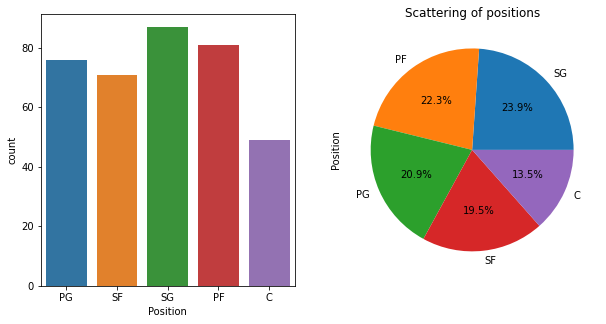

In [36]:
fig1, fig2= plt.subplots(figsize=(10,5),ncols=2)
plt.figure(1, figsize=(5,5))
plt.title("Scattering of positions")
data1['Position'].value_counts().plot.pie(autopct="%1.1f%%")
sns.countplot(ax=fig2[0], x='Position',data=data1)
plt.show()

q4- we defined variable named features to be our x axis and defined the 'salary' as target(y)
we built train and test to x and y and presented only the first five rows of each.

In [41]:

features = ['Age', 'Height(cm)','Weight']
x = data_flt[features]
y = data_flt['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
display(x_train.head())
display(pd.DataFrame(y_test.head()))

,Age,Height(cm),Weight
332,22.0,200.66,232.0
285,26.0,198.12,220.0
191,26.0,190.50,208.0
24,21.0,210.82,200.0
181,33.0,205.74,245.0


,Salary
232,2085671.0
42,1636842.0
19,6300000.0
435,3075880.0
71,3553917.0


q5- The measure we are required to predict is a numerical measure so we would like to use a decision tree that gives us a numerical value.
Therefore we will use a regressor

In [61]:
model= DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

q6- We performed a function that would predict the salary forecast with the highest accuracy, according to a model of forecasting and   presented the result  

In [64]:
def eval(x,y,model):
    pred = model.predict(x)
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   
eval(x_test,y_test,model)

MSE: 6312848.191


q7-We treated 'positions' by inserting their values into numeric values so that we could work with the prediction model in a numerical method, we added the column into the variable FEATURES and made a new model that predicts salaries, according to which we found the model less accurate because the value is higher and therefore possible While the prediction works better regardless of the player's position

In [66]:
data_flt['Position']= data1['Position']
features = ['Age', 'Height(cm)','Weight','Position']
x = pd.get_dummies(data_flt[features])
y = data_flt['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
model= DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
def eval(x,y,model):
    pred = model.predict(x)
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   
eval(x_test,y_test,model)

MSE: 6736412.723


q8- we defined the max_depth to ten and we found that this value is the lower

In [67]:
data_flt['Position']= data1['Position']
features = ['Age', 'Height(cm)','Weight','Position']
x = pd.get_dummies(data_flt[features])
y = data_flt['Salary']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
model= DecisionTreeClassifier(max_depth=10,random_state=42)
model.fit(x_train,y_train)
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values.reshape((-1,1))
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   
eval(x_test,y_test,model)

MSE: 5897160.850
